In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('movie_metadata.csv')
df = df.drop(columns=["color", "director_name", "num_critic_for_reviews", "director_facebook_likes", "actor_3_facebook_likes", "actor_2_name", "actor_1_facebook_likes", "actor_1_name", "cast_total_facebook_likes", "actor_3_name", "facenumber_in_poster", "plot_keywords", "movie_imdb_link", "language", "country", "actor_2_facebook_likes", "movie_facebook_likes"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,duration,gross,genres,movie_title,num_voted_users,num_user_for_reviews,content_rating,budget,title_year,imdb_score,aspect_ratio
0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,3054.0,PG-13,237000000.0,2009.0,7.9,1.78
1,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,1238.0,PG-13,300000000.0,2007.0,7.1,2.35
2,148.0,200074175.0,Action|Adventure|Thriller,Spectre,275868,994.0,PG-13,245000000.0,2015.0,6.8,2.35
3,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,1144337,2701.0,PG-13,250000000.0,2012.0,8.5,2.35
5,132.0,73058679.0,Action|Adventure|Sci-Fi,John Carter,212204,738.0,PG-13,263700000.0,2012.0,6.6,2.35


In [3]:
X = df[["imdb_score"]]
y = df["gross"].values.reshape(-1, 1)
print(X.shape, y.shape)

(3784, 1) (3784, 1)


In [4]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,imdb_score
4590,7.6
1722,7.5
1083,5.5
892,6.7
953,7.4


In [5]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [6]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

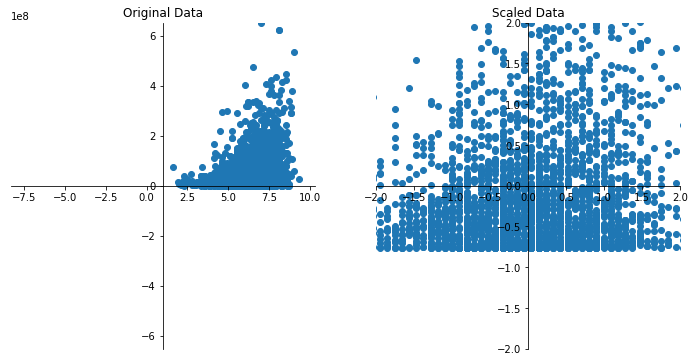

In [8]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["imdb_score"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["imdb_score"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [9]:
X = pd.get_dummies(df[["imdb_score"]])
y = df["gross"].values.reshape(-1, 1)
X.head()

,imdb_score
0,7.9
1,7.1
2,6.8
3,8.5
5,6.6


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

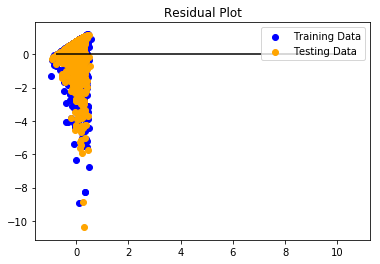

In [12]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.3941155996073273, R2: 0.04155549516920276


In [14]:
print(model.score(X_train_scaled, y_train_scaled))
print(model.score(X_test_scaled, y_test_scaled))

0.044908685774593504
0.04155549516920276
